In [104]:
import pandas as pd
import ast
from tabulate import tabulate
import csv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import statistics
from IPython.display import display, HTML
import seaborn as sns
import streamlit as st
import re
from prettytable import PrettyTable
from termcolor import colored

from streamlit_jupyter import StreamlitPatcher, tqdm

StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

In [105]:
file_path = "passed_info.csv"

In [106]:
data = pd.read_csv(file_path)

# Create a DataFrame from the dataset
df = pd.DataFrame(data)
# Remove duplicates
df = df.drop_duplicates(subset = ["actor", "object"])

In [107]:
# Convert strings to dictionaries in the "object" column
df["actor"] = df["actor"].apply(ast.literal_eval)
df["verb"] = df["object"].apply(ast.literal_eval)
df["object"] = df["object"].apply(ast.literal_eval)

# Function to replace "parent_chapter_pid" field with a string value
def replace_parent_chapter_pid(row):
    parent_chapter_pid = row["object"]["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]["parent_chapter_pid"]
    if parent_chapter_pid == 333:
        return "Partie I"  
    elif parent_chapter_pid == 334:
        return "Partie II" 
    elif parent_chapter_pid == 336:
        return "Partie III" 
    elif parent_chapter_pid == 337:
        return "Partie IV"
    else : 
        return "Partie V"

# Replace "parent_chapter_pid" field with a string value based on its original value
df["parent_chapter_pid"] = df.apply(replace_parent_chapter_pid, axis=1)

extracted_data = pd.DataFrame(df.apply(lambda x: [
    x["actor"]["name"],
    round(x["object"]["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]["percentage_of_success"]),
    x["parent_chapter_pid"]
], axis=1).tolist(), columns=["actor", "object", "parent_chapter_pid"])

# Create a list of headers for the grid
headers = ["Name of Student", "Percentage of Success", "Chapter"]

# # Print the beautiful grid
# print(tabulate(extracted_data, headers = headers, colalign = ('left', 'center', 'left'), tablefmt="fancy_grid"))
# Display the table using Streamlit
# st.write(tabulate(extracted_data, headers=headers, colalign=('left', 'center', 'left'), tablefmt="fancy_grid"))
st.table(extracted_data)


DeltaGenerator()

In [108]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Remove duplicates based on "actor" and "object" columns
df = df.drop_duplicates(subset=["actor", "object"])

# Extract parent_chapter_pid and percentage_of_success values
parent_chapter_pids = []
success_scores = []
for _, row in df.iterrows():
    object_data = eval(row["object"])
    extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
    parent_chapter_pid = extensions["parent_chapter_pid"]
    percentage_of_success = extensions["percentage_of_success"]
    if parent_chapter_pid is not None and percentage_of_success is not None:
        parent_chapter_pids.append(str(parent_chapter_pid))
        success_scores.append(percentage_of_success)
        
# Calculate average success score per parent_chapter_pid
unique_pids = list(set(parent_chapter_pids))
average_scores = []
for pid in unique_pids:
    scores = [score for score, p in zip(success_scores, parent_chapter_pids) if p == pid]
    average_score = np.mean(scores)
    average_scores.append(average_score)

# Sort unique_pids and average_scores based on unique_pids values
unique_pids, average_scores = zip(*sorted(zip(unique_pids, average_scores)))

# Define a color palette for the bars
colors = plt.cm.get_cmap('tab10', len(unique_pids))

# # Plot the graph
# plt.figure(figsize=(10, 8))
# bars = plt.bar(unique_pids, average_scores, color=colors(range(len(unique_pids))))
# plt.xlabel("Parent Chapter PID")
# plt.ylabel("Average Success Score")
# plt.title("Average Success Score per Parent Chapter PID")

# # Add a legend for the colors
# plt.legend(bars, unique_pids)

# # Add percentage labels on each bar
# for i, bar in enumerate(bars):
#     height = bar.get_height()
#     percentage = f"{average_scores[i]:.2f}%"
#     plt.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')


# plt.show()

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(unique_pids, average_scores, color=colors(range(len(unique_pids))))
ax.set_xlabel("Parent Chapter PID")
ax.set_ylabel("Average Success Score")
ax.set_title("Average Success Score per Parent Chapter PID")

# Add a legend for the colors
ax.legend(bars, unique_pids)

# Add percentage labels on each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = f"{average_scores[i]:.2f}%"
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

# Display the plot using Streamlit
st.pyplot(fig)

C:\Users\2370\AppData\Local\Temp\ipykernel_22860\863410671.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_pids))


DeltaGenerator()

In [112]:
# Calculate average success score per parent_chapter_pid
unique_pids = list(set(parent_chapter_pids))
average_scores = []
for pid in unique_pids:
    scores = [score for score, p in zip(success_scores, parent_chapter_pids) if p == pid]
    average_score = np.mean(scores)
    average_scores.append(average_score)
    # Sidebar options
selected_graph = st.sidebar.selectbox("Select Graph", ["Bar Chart", "Histogram"])
if selected_graph == "Bar Chart":
# Plot the graph
    plt.figure(figsize=(10, 8))
    plt.bar(unique_pids, average_scores)
    plt.xlabel("Parent Chapter PID")
    plt.ylabel("Average Success Score")
    plt.title("Average Success Score per Parent Chapter PID")
#     plt.show()
    st.pyplot(plt)
elif selected_graph == "Histogram":
    # Calculate passing percentage per parent_chapter_pid
    unique_pids = list(set(parent_chapter_pids))
    passing_percentages = []
    for pid in unique_pids:
        scores = [score for score, p in zip(success_scores, parent_chapter_pids) if p == pid]
        passing_count = sum(score >= 70 for score in scores)
        passing_percentage = (passing_count / len(scores)) * 100
        passing_percentages.append(passing_percentage)
#     print(unique_pids)
    
#     print(passing_percentages)
    

    # Sort unique_pids and average_scores based on unique_pids values
    unique_pids, passing_percentages = zip(*sorted(zip(unique_pids, passing_percentages)))

    print(unique_pids)
    
    print(passing_percentages)

    # Define a color palette for the bars
    colors = plt.cm.get_cmap('tab10', len(unique_pids))

# # Plot the graph
# plt.figure(figsize=(10, 8))
# bars = plt.bar(unique_pids, passing_percentages, color=colors(range(len(unique_pids))))
# plt.xlabel("Parent Chapter PID")
# plt.ylabel("Percentage of passing(>70)")
# plt.title("Passing percentage per Parent Chapter PID")

    # Plot the graph
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.bar(unique_pids, passing_percentages, color=colors(range(len(unique_pids))))
    ax.set_xlabel("Parent Chapter PID")
    ax.set_ylabel("Percentage of passing(>70)")
    ax.set_title("Passing percentage per Parent Chapter PID")

# # Add a legend for the colors
# plt.legend(bars, unique_pids)
           
# # Add percentage labels to the bars
# for i in range(len(unique_pids)):
#     percentage = f"{passing_percentages[i]:.2f}%"
#     plt.text(i, passing_percentages[i], percentage, ha='center', va='bottom')


# plt.show()
# Add a legend for the colors
    ax.legend(bars, unique_pids)

# Add percentage labels on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage =  f"{passing_percentages[i]:.2f}%"
        ax.text(i, passing_percentages[i], percentage, ha='center', va='bottom')

    # Display the plot using Streamlit
    st.pyplot(fig)

In [110]:
# elif selected_graph == "Histogram":
#     # Calculate passing percentage per parent_chapter_pid
#     unique_pids = list(set(parent_chapter_pids))
#     passing_percentages = []
#     for pid in unique_pids:
#         scores = [score for score, p in zip(success_scores, parent_chapter_pids) if p == pid]
#         passing_count = sum(score >= 70 for score in scores)
#         passing_percentage = (passing_count / len(scores)) * 100
#         passing_percentages.append(passing_percentage)
# #     print(unique_pids)
    
# #     print(passing_percentages)
    

#     # Sort unique_pids and average_scores based on unique_pids values
#     unique_pids, passing_percentages = zip(*sorted(zip(unique_pids, passing_percentages)))

#     print(unique_pids)
    
#     print(passing_percentages)

#     # Define a color palette for the bars
#     colors = plt.cm.get_cmap('tab10', len(unique_pids))

# # # Plot the graph
# # plt.figure(figsize=(10, 8))
# # bars = plt.bar(unique_pids, passing_percentages, color=colors(range(len(unique_pids))))
# # plt.xlabel("Parent Chapter PID")
# # plt.ylabel("Percentage of passing(>70)")
# # plt.title("Passing percentage per Parent Chapter PID")

#     # Plot the graph
#     fig, ax = plt.subplots(figsize=(10, 8))
#     bars = ax.bar(unique_pids, passing_percentages, color=colors(range(len(unique_pids))))
#     ax.set_xlabel("Parent Chapter PID")
#     ax.set_ylabel("Percentage of passing(>70)")
#     ax.set_title("Passing percentage per Parent Chapter PID")

# # # Add a legend for the colors
# # plt.legend(bars, unique_pids)
           
# # # Add percentage labels to the bars
# # for i in range(len(unique_pids)):
# #     percentage = f"{passing_percentages[i]:.2f}%"
# #     plt.text(i, passing_percentages[i], percentage, ha='center', va='bottom')


# # plt.show()
# # Add a legend for the colors
#     ax.legend(bars, unique_pids)

# # Add percentage labels on each bar
#     for i, bar in enumerate(bars):
#         height = bar.get_height()
#         percentage =  f"{passing_percentages[i]:.2f}%"
#         ax.text(i, passing_percentages[i], percentage, ha='center', va='bottom')

#     # Display the plot using Streamlit
#     st.pyplot(fig)

SyntaxError: invalid syntax (2014221628.py, line 1)

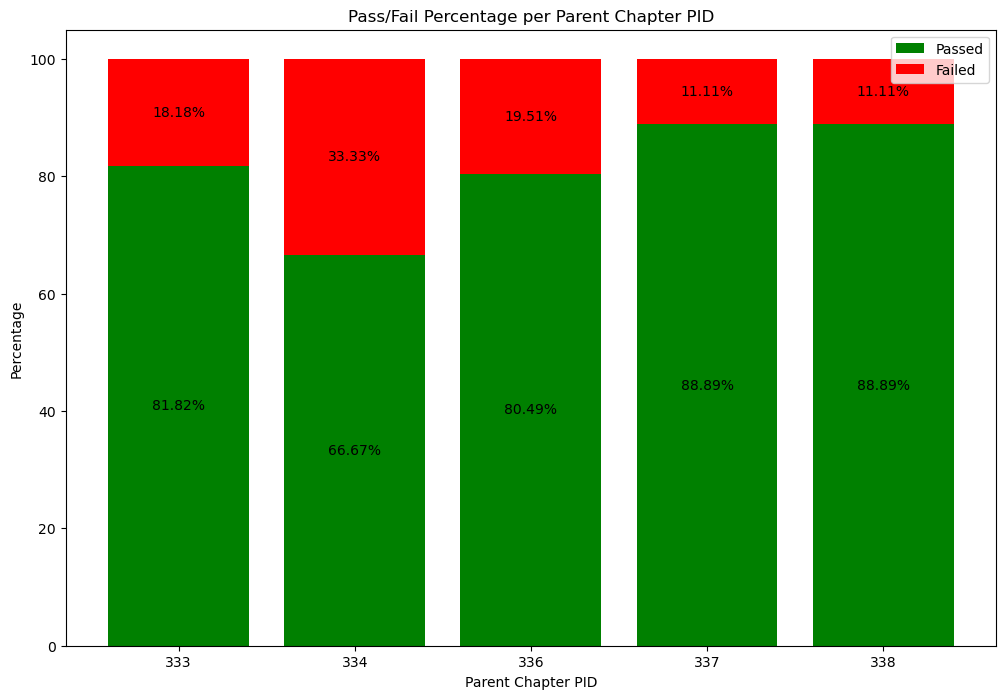

DeltaGenerator()

In [101]:
# Calculate passing and failing percentages per parent_chapter_pid
unique_pids = list(set(parent_chapter_pids))

passing_percentages = []
failing_percentages = []
for pid in unique_pids:
    scores = [score for score, p in zip(success_scores, parent_chapter_pids) if p == pid]
    passing_count = sum(score >= 70 for score in scores)
    failing_count = len(scores) - passing_count
    passing_percentage = (passing_count / len(scores)) * 100
    failing_percentage = (failing_count / len(scores)) * 100
    passing_percentages.append(passing_percentage)
    failing_percentages.append(failing_percentage)
    
# Sort unique_pids and average_scores based on unique_pids values
unique_pids, average_scores = zip(*sorted(zip(unique_pids, passing_percentages)))

# Plot the diagram
plt.figure(figsize=(12, 8))
plt.bar(unique_pids, passing_percentages, label='Passed', color='green')
plt.bar(unique_pids, failing_percentages, bottom=passing_percentages, label='Failed', color='red')
plt.xlabel("Parent Chapter PID")
plt.ylabel("Percentage")
plt.title("Pass/Fail Percentage per Parent Chapter PID")
plt.legend()

for i in range(len(unique_pids)):
    passing_percentage = passing_percentages[i]
    failing_percentage = failing_percentages[i]
    plt.text(unique_pids[i], passing_percentage / 2, f"{passing_percentage:.2f}%", ha='center', va='center')
    plt.text(unique_pids[i], passing_percentage + failing_percentage / 2, f"{failing_percentage:.2f}%", ha='center', va='center')

plt.show()
st.pyplot(plt)


In [351]:
# # Prepare table headers
# headers = ["Name", "Parent Chapter PID", "Percentage of Success"]
# Prepare table rows
# rows = []
# percentage_of_success_values = []
# students = set()
# tests_passed = {}

# for _, row in df.iterrows():
#     actor_data = eval(row["actor"])
#     name = actor_data["name"]
#     match = re.search(r"([a-zA-Z]+)\.([a-zA-Z]+)@", name)
#     if match:
#         # Get the edited name from the regular expression match
#         edited_name = f"{match.group(1).capitalize()} {match.group(2).capitalize()}"
#         name = edited_name
#     else:
#         name = "Unknown"
#     students.add(name)
#     object_data = eval(row["object"])
#     extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
#     percentage_of_success = extensions["percentage_of_success"]
#     if percentage_of_success is not None:
#         percentage_of_success = int(percentage_of_success)
#         rows.append([name, percentage_of_success])
#         percentage_of_success_values.append(percentage_of_success)

# # Prepare table rows
# rows = []
# percentage_of_success_values = []
# students = set()
# tests_passed = {}
# for _, row in df.iterrows():
#     actor_data = eval(row["actor"])
#     name = actor_data["name"]
#     match = re.search(r"([a-zA-Z]+)\.([a-zA-Z]+)@", name)
#     if match:
#         # Get the edited name from the regular expression match
#         edited_name = f"{match.group(1).capitalize()} {match.group(2).capitalize()}"
#         name = edited_name
#     else:
#         name = "Unknown"
#     students.add(name)
#     object_data = eval(row["object"])
#     extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
#     parent_chapter_pid = extensions["parent_chapter_pid"]
#     percentage_of_success = extensions["percentage_of_success"]
#     if percentage_of_success is not None:
#         percentage_of_success_values.append(int(percentage_of_success))
#         if parent_chapter_pid not in tests_passed:
#             tests_passed[parent_chapter_pid] = 0
#         tests_passed[parent_chapter_pid] += 1
# #         print(tests_passed[parent_chapter_pid])
#     rows.append([name, parent_chapter_pid, percentage_of_success])

# table = tabulate(rows, headers, tablefmt="fancy_grid")
# #print(table)
# df = pd.DataFrame(rows, columns=headers)

# # Generate HTML table
# table_html = df.to_html()

# # Display the HTML table and summary statistics
# display(HTML(table_html))


,Name,Parent Chapter PID,Percentage of Success
0,Damien Carron,337,50.000000
1,Damien Carron,336,50.000000
2,Damien Carron,334,83.333333
3,Yvonne Mery,338,80.000000
4,Yvonne Mery,337,100.000000
5,Yvonne Mery,336,83.333333
6,Yvonne Mery,334,83.333333
7,Yvonne Mery,334,66.666667
8,Yvonne Mery,333,100.000000
9,Yvonne Mery,333,75.000000


In [98]:
import re
import statistics

# Prepare table headers
headers = ["Name", "Average Percentage of Success (%)"]
# Prepare table rows
rows = []
percentage_of_success_values = []
students = set()
tests_passed = {}

for _, row in df.iterrows():
    actor_data = eval(row["actor"])
    name = actor_data["name"]
    match = re.search(r"([a-zA-Z]+)\.([a-zA-Z]+)@", name)
    if match:
        # Get the edited name from the regular expression match
        edited_name = f"{match.group(1).capitalize()} {match.group(2).capitalize()}"
        name = edited_name
    else:
        name = "Unknown"
    students.add(name)
    object_data = eval(row["object"])
    extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
    percentage_of_success = extensions["percentage_of_success"]
    if percentage_of_success is not None:
        percentage_of_success = int(percentage_of_success)
        rows.append([name, percentage_of_success])
        percentage_of_success_values.append(percentage_of_success)

# # Prepare table rows
# rows = []
# students = set()  # Create a set to store unique student names
# tests_passed = {}

# for _, row in df.iterrows():
#     actor_data = eval(row["actor"])
#     name = actor_data["name"]
#     match = re.search(r"([a-zA-Z]+)\.([a-zA-Z]+)@", name)
#     if match:
#         # Get the edited name from the regular expression match
#         edited_name = f"{match.group(1).capitalize()} {match.group(2).capitalize()}"
#         name = edited_name
#     students.add(name)  # Add the student name to the set
#     object_data = eval(row["object"])
#     extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
#     percentage_of_success = extensions["percentage_of_success"]
#     if percentage_of_success is not None:
#         percentage_of_success = int(percentage_of_success)
#         rows.append([name, percentage_of_success])

# Generate per-student average percentage of success
student_average_scores = {}
for student in students:
    student_scores = [score for name, score in rows if name == student]
    average_score = statistics.mean(student_scores)
    student_average_scores[student] = average_score

# Add rows to the table
table_rows = []
for student in students:
    average_percentage = student_average_scores[student]
    table_rows.append([student, round(average_percentage)])

st.table(table_rows)
table = tabulate(table_rows, headers, tablefmt="fancy_grid")
print(table)

╒═════════════════════╤═════════════════════════════════════╕
│ Name                │   Average Percentage of Success (%) │
╞═════════════════════╪═════════════════════════════════════╡
│ Atenas Anderson     │                                  94 │
├─────────────────────┼─────────────────────────────────────┤
│ Damien Carron       │                                  64 │
├─────────────────────┼─────────────────────────────────────┤
│ Ambroise Baillifard │                                  79 │
├─────────────────────┼─────────────────────────────────────┤
│ Unknown             │                                  80 │
├─────────────────────┼─────────────────────────────────────┤
│ Uliana Shylo        │                                  75 │
├─────────────────────┼─────────────────────────────────────┤
│ Vincent Groff       │                                  87 │
├─────────────────────┼─────────────────────────────────────┤
│ Yvonne Mery         │                                  80 │
├───────

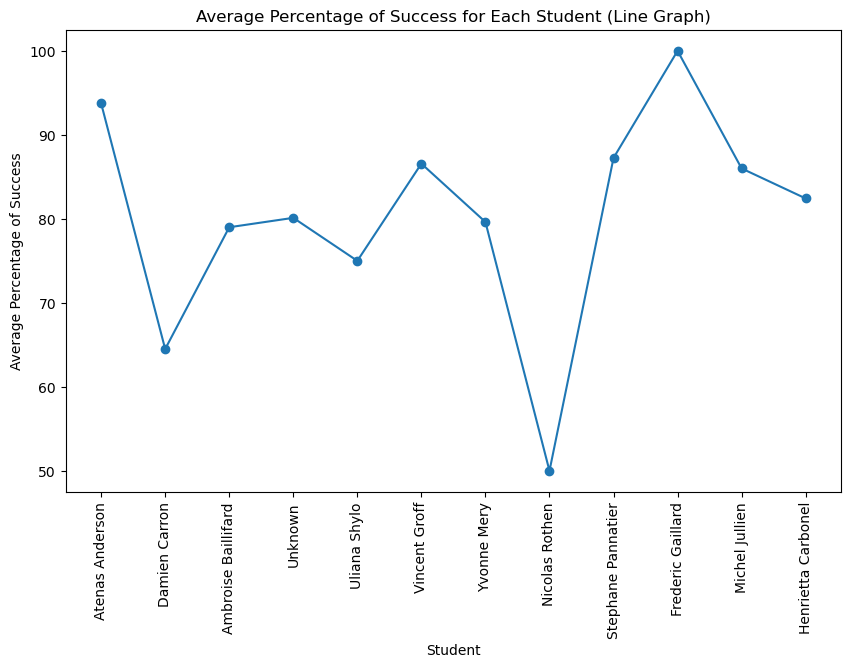

DeltaGenerator()

In [97]:
# Line Graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(students)), list(student_average_scores.values()), marker='o')
plt.xticks(range(len(students)), students, rotation=90)
plt.xlabel("Student")
plt.ylabel("Average Percentage of Success")
plt.title("Average Percentage of Success for Each Student (Line Graph)")
plt.show()

st.pyplot(plt)


In [78]:
# # Bar Chart
# plt.figure(figsize=(10, 6))
# plt.bar(list(students), list(student_average_scores.values()))
# plt.xlabel("Student")
# plt.ylabel("Average Percentage of Success")
# plt.title("Average Percentage of Success for Each Student (Bar Chart)")
# plt.xticks(rotation=90)
# plt.show()
# Create the bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(students), list(student_average_scores.values()))
ax.set_xlabel("Student")
ax.set_ylabel("Average Percentage of Success")
ax.set_title("Scores of Individual Students")
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Display the chart using Streamlit
st.pyplot(fig)

DeltaGenerator()

In [79]:


# # Print the names of all students who took the test

print(students)

# Extract first and last name
students_set = []
for student in students:
    match = re.search(r"([a-zA-Z]+)\.([a-zA-Z]+)@", student)
    if match:
        first_name = match.group(1).capitalize()
        last_name = match.group(2).capitalize()
        full_name = f"{first_name} {last_name}"
        students_set.append(full_name)
    else:
        full_name = "Unknown"
        students_set.append(full_name)

# for student in students_set:
   
#     # Create a table with one column
#     table = PrettyTable(["Students"])

# # Add rows to the table
# for student in students_set:
#     table.add_row([student])

# # Set the color for the table
# table_color = "cyan"

# # Print the colored table
# print(colored(table.get_string(), table_color))


{'Atenas Anderson', 'Damien Carron', 'Ambroise Baillifard', 'cindy.zen-ruffinen@fernuni.ch', 'Uliana Shylo', 'Vincent Groff', 'Yvonne Mery', 'Nicolas Rothen', 'Stephane Pannatier', 'fredgaillard@bluewin.ch', 'Frederic Gaillard', 'Michel Jullien', 'Henrietta Carbonel', 'ambroisebaillifard@gmail.com'}


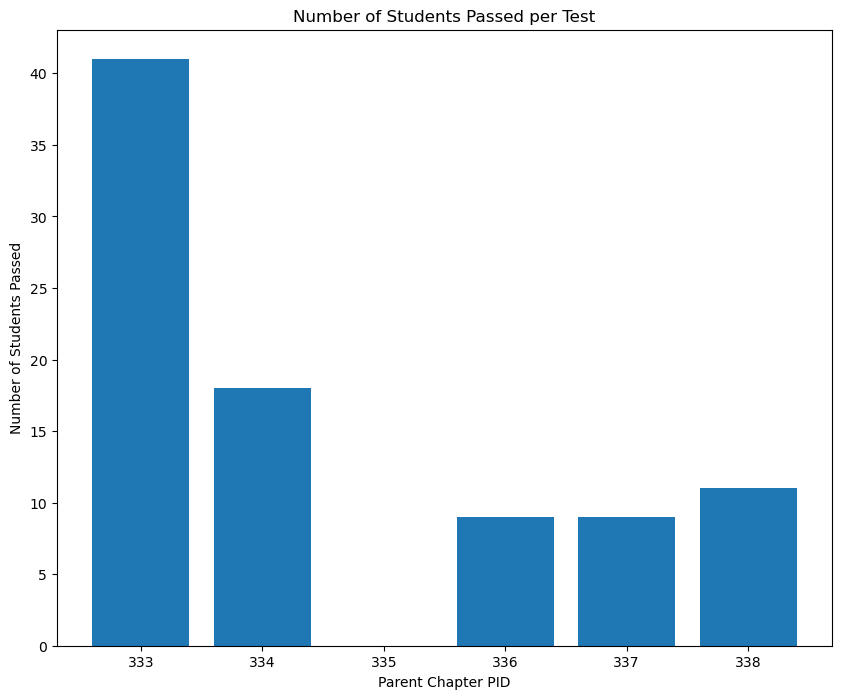

In [315]:
# # Plot the number of students passed each test
# tests = list(tests_passed.keys())
# pass_counts = list(tests_passed.values())
# print(pass_counts)
# print(tests)

# plt.figure(figsize=(10, 8))
# plt.bar(tests, pass_counts)
# plt.xlabel("Parent Chapter PID")
# plt.ylabel("Number of Students Passed")
# plt.title("Number of Students Passed per Test")
# plt.show()
# Plot the number of students passed each test
tests = [key for key in tests_passed.keys() if key != 335]
pass_counts = [tests_passed[key] for key in tests]

plt.figure(figsize=(10, 8))
plt.bar(tests, pass_counts)
plt.xlabel("Parent Chapter PID")
plt.ylabel("Number of Students Passed")
plt.title("Number of Students Passed per Test")
plt.show()

In [83]:
# Compute summary statistics
mean = statistics.mean(percentage_of_success_values)
median = statistics.median(percentage_of_success_values)
mode = statistics.mode(percentage_of_success_values)
minimum = min(percentage_of_success_values)
maximum = max(percentage_of_success_values)
standard_deviation = statistics.stdev(percentage_of_success_values)

# Print the summary statistics
print("Summary Statistics for percentage_of_success:")
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Standard Deviation:", standard_deviation)

Summary Statistics for percentage_of_success:
Mean: 81.32954545454545
Median: 83.0
Mode: 100
Minimum: 40
Maximum: 100
Standard Deviation: 17.813027384995504


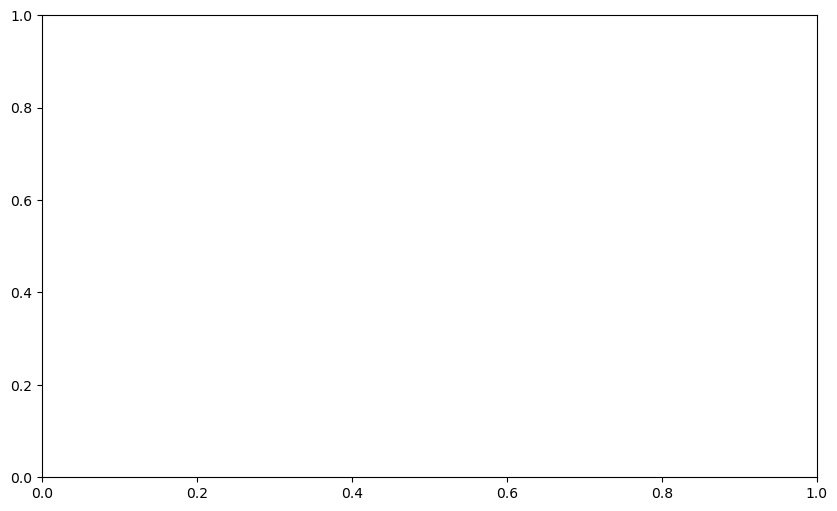

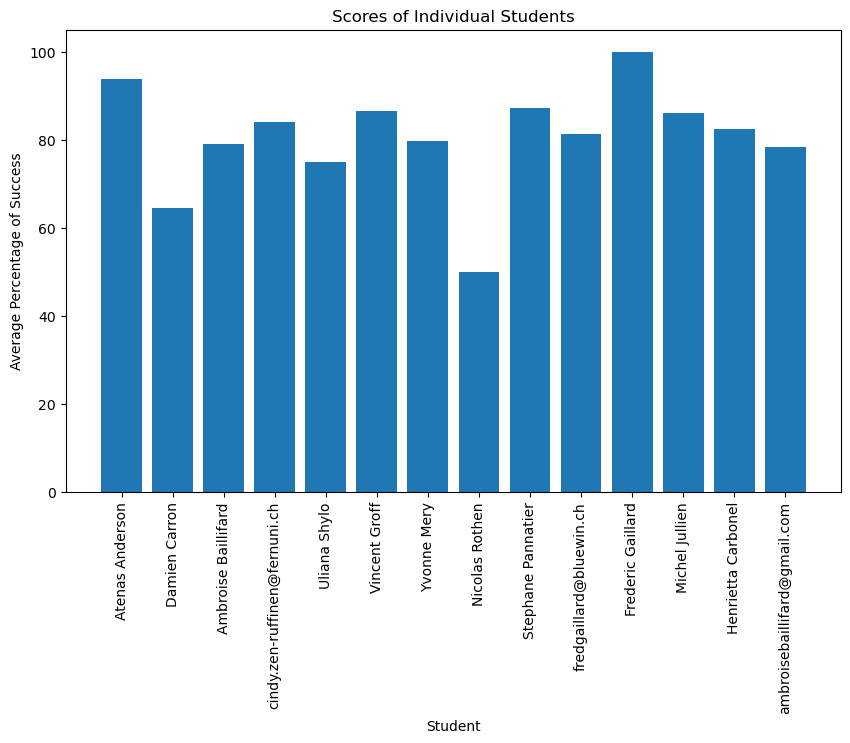

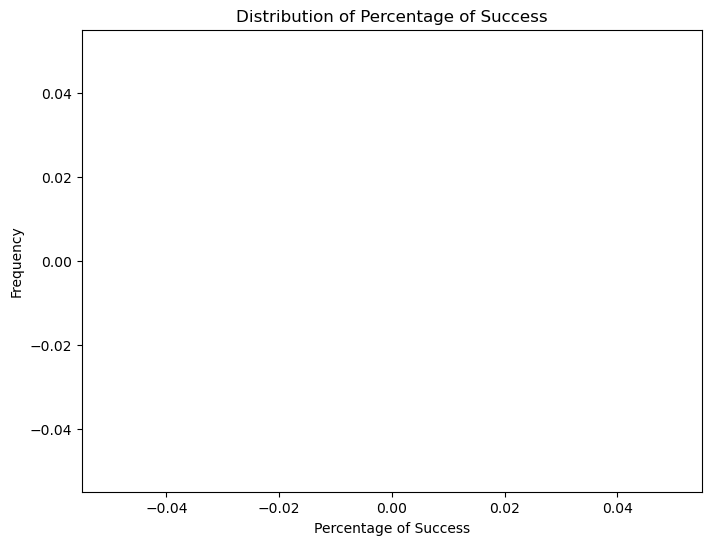

In [81]:
# Plot the distribution of percentage_of_success
plt.figure(figsize=(8, 6))
sns.histplot(percentage_of_success_values, kde=True)
plt.xlabel("Percentage of Success")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage of Success")
plt.show()

In [82]:
# # Individual Student Analysis
# for student, scores in students.items():
#     student_mean = statistics.mean(scores)
#     student_median = statistics.median(scores)
#     student_mode = statistics.mode(scores)
#     student_minimum = min(scores)
#     student_maximum = max(scores)
#     student_standard_deviation = statistics.stdev(scores)

#     print(f"\nIndividual Analysis for Student: {student}")
#     print("Mean:", student_mean)
#     print("Median:", student_median)
#     print("Mode:", student_mode)
#     print("Minimum:", student_minimum)
#     print("Maximum:", student_maximum)
#     print("Standard Deviation:", student_standard_deviation)

#     plt.figure(figsize=(8, 6))
#     sns.histplot(scores, kde=True)
#     plt.xlabel("Percentage of Success")
#     plt.ylabel("Frequency")
#     plt.title(f"Distribution of Percentage of Success for Student: {student}")
#     plt.show()
# Individual Student Analysis
# Initialize the students dictionary
students = {}

# Prepare table rows
rows = []
percentage_of_success_values = []

for _, row in df.iterrows():
    actor_data = eval(row["actor"])
    name = actor_data["name"]
    students.setdefault(name, [])  # Initialize an empty list for each student if not already present
    object_data = eval(row["object"])
    extensions = object_data["definition"]["extensions"]["http://lrs&46;learninglocker&46;net/define/extensions/kairos"]
    percentage_of_success = extensions["percentage_of_success"]
    if percentage_of_success is not None:
        percentage_of_success_values.append(int(percentage_of_success))
        students[name].append(int(percentage_of_success))
        
# Set title
st.title("Student Analysis")

# Create sidebar
st.sidebar.title("Options")
# Perform individual student analysis
for student, scores in students.items():
    student_mean = statistics.mean(scores)
    student_median = statistics.median(scores)
    student_mode = statistics.mode(scores)
    student_minimum = min(scores)
    student_maximum = max(scores)
    
    if len(scores) >= 2:
        student_standard_deviation = statistics.stdev(scores)
    else:
        student_standard_deviation = 0  # Set standard deviation to 0 if there is only one data point

#     print(f"\nIndividual Analysis for Student: {student}")
#     print("Mean:", student_mean)
#     print("Median:", student_median)
#     print("Mode:", student_mode)
#     print("Minimum:", student_minimum)
#     print("Maximum:", student_maximum)
#     print("Standard Deviation:", student_standard_deviation)

#     plt.figure(figsize=(8, 6))
#     sns.histplot(scores, kde=True)
#     plt.xlabel("Percentage of Success")
#     plt.ylabel("Frequency")
#     plt.title(f"Distribution of Percentage of Success for Student: {student}")
#     plt.show()


    # Display individual analysis
    st.write(f"\nIndividual Analysis for Student: {student}")
    st.write("Mean:", student_mean)
    st.write("Median:", student_median)
    st.write("Mode:", student_mode)
    st.write("Minimum:", student_minimum)
    st.write("Maximum:", student_maximum)
    st.write("Standard Deviation:", student_standard_deviation)

    # Generate histogram plot
    plt.figure(figsize=(8, 6))
    sns.histplot(scores, kde=True)
    plt.xlabel("Percentage of Success")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Percentage of Success for Student: {student}")
    st.pyplot(plt)


# Student Analysis


Individual Analysis for Student: damien.carron@fernuni.ch

Mean:

64.5

Median:

62.5

Mode:

50

Minimum:

50

Maximum:

83

Standard Deviation:

17.05872210923198


Individual Analysis for Student: yvonne.mery@fernuni.ch

Mean:

79.625

Median:

81.5

Mode:

100

Minimum:

50

Maximum:

100

Standard Deviation:

16.63848808378591


Individual Analysis for Student: nicolas.rothen@fernuni.ch

Mean:

50

Median:

50

Mode:

50

Minimum:

50

Maximum:

50

Standard Deviation:

0


Individual Analysis for Student: stephane.pannatier@fernuni.ch

Mean:

87.25

Median:

95.0

Mode:

100

Minimum:

50

Maximum:

100

Standard Deviation:

17.782415069789753


Individual Analysis for Student: atenas.anderson@unidistance.ch

Mean:

93.75

Median:

100.0

Mode:

100

Minimum:

75

Maximum:

100

Standard Deviation:

12.5


Individual Analysis for Student: ambroise.baillifard@unidistance.ch

Mean:

79

Median:

79.0

Mode:

83

Minimum:

75

Maximum:

83

Standard Deviation:

5.656854249492381


Individual Analysis for Student: fredgaillard@bluewin.ch

Mean:

81.375

Median:

79.0

Mode:

100

Minimum:

50

Maximum:

100

Standard Deviation:

17.480942003603047


Individual Analysis for Student: uliana.shylo@unidistance.ch

Mean:

75

Median:

75

Mode:

75

Minimum:

75

Maximum:

75

Standard Deviation:

0


Individual Analysis for Student: ambroisebaillifard@gmail.com

Mean:

78.23809523809524

Median:

75

Mode:

75

Minimum:

40

Maximum:

100

Standard Deviation:

18.633047957606834


Individual Analysis for Student: frederic.gaillard@unidistance.ch

Mean:

100

Median:

100

Mode:

100

Minimum:

100

Maximum:

100

Standard Deviation:

0


Individual Analysis for Student: vincent.groff@unidistance.ch

Mean:

86.57142857142857

Median:

100

Mode:

100

Minimum:

50

Maximum:

100

Standard Deviation:

20.386737051795404


Individual Analysis for Student: jean-michel.jullien@unidistance.ch

Mean:

86

Median:

83

Mode:

83

Minimum:

75

Maximum:

100

Standard Deviation:

12.767145334803704


Individual Analysis for Student: cindy.zen-ruffinen@fernuni.ch

Mean:

84

Median:

100

Mode:

100

Minimum:

50

Maximum:

100

Standard Deviation:

23.021728866442675


Individual Analysis for Student: henrietta.carbonel@unidistance.ch

Mean:

82.42857142857143

Median:

75

Mode:

100

Minimum:

66

Maximum:

100

Standard Deviation:

16.711843533426055